# MLR

## Import depandencies

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [46]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [47]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [48]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


# 1. EDA

In [51]:
df.isnull().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [52]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


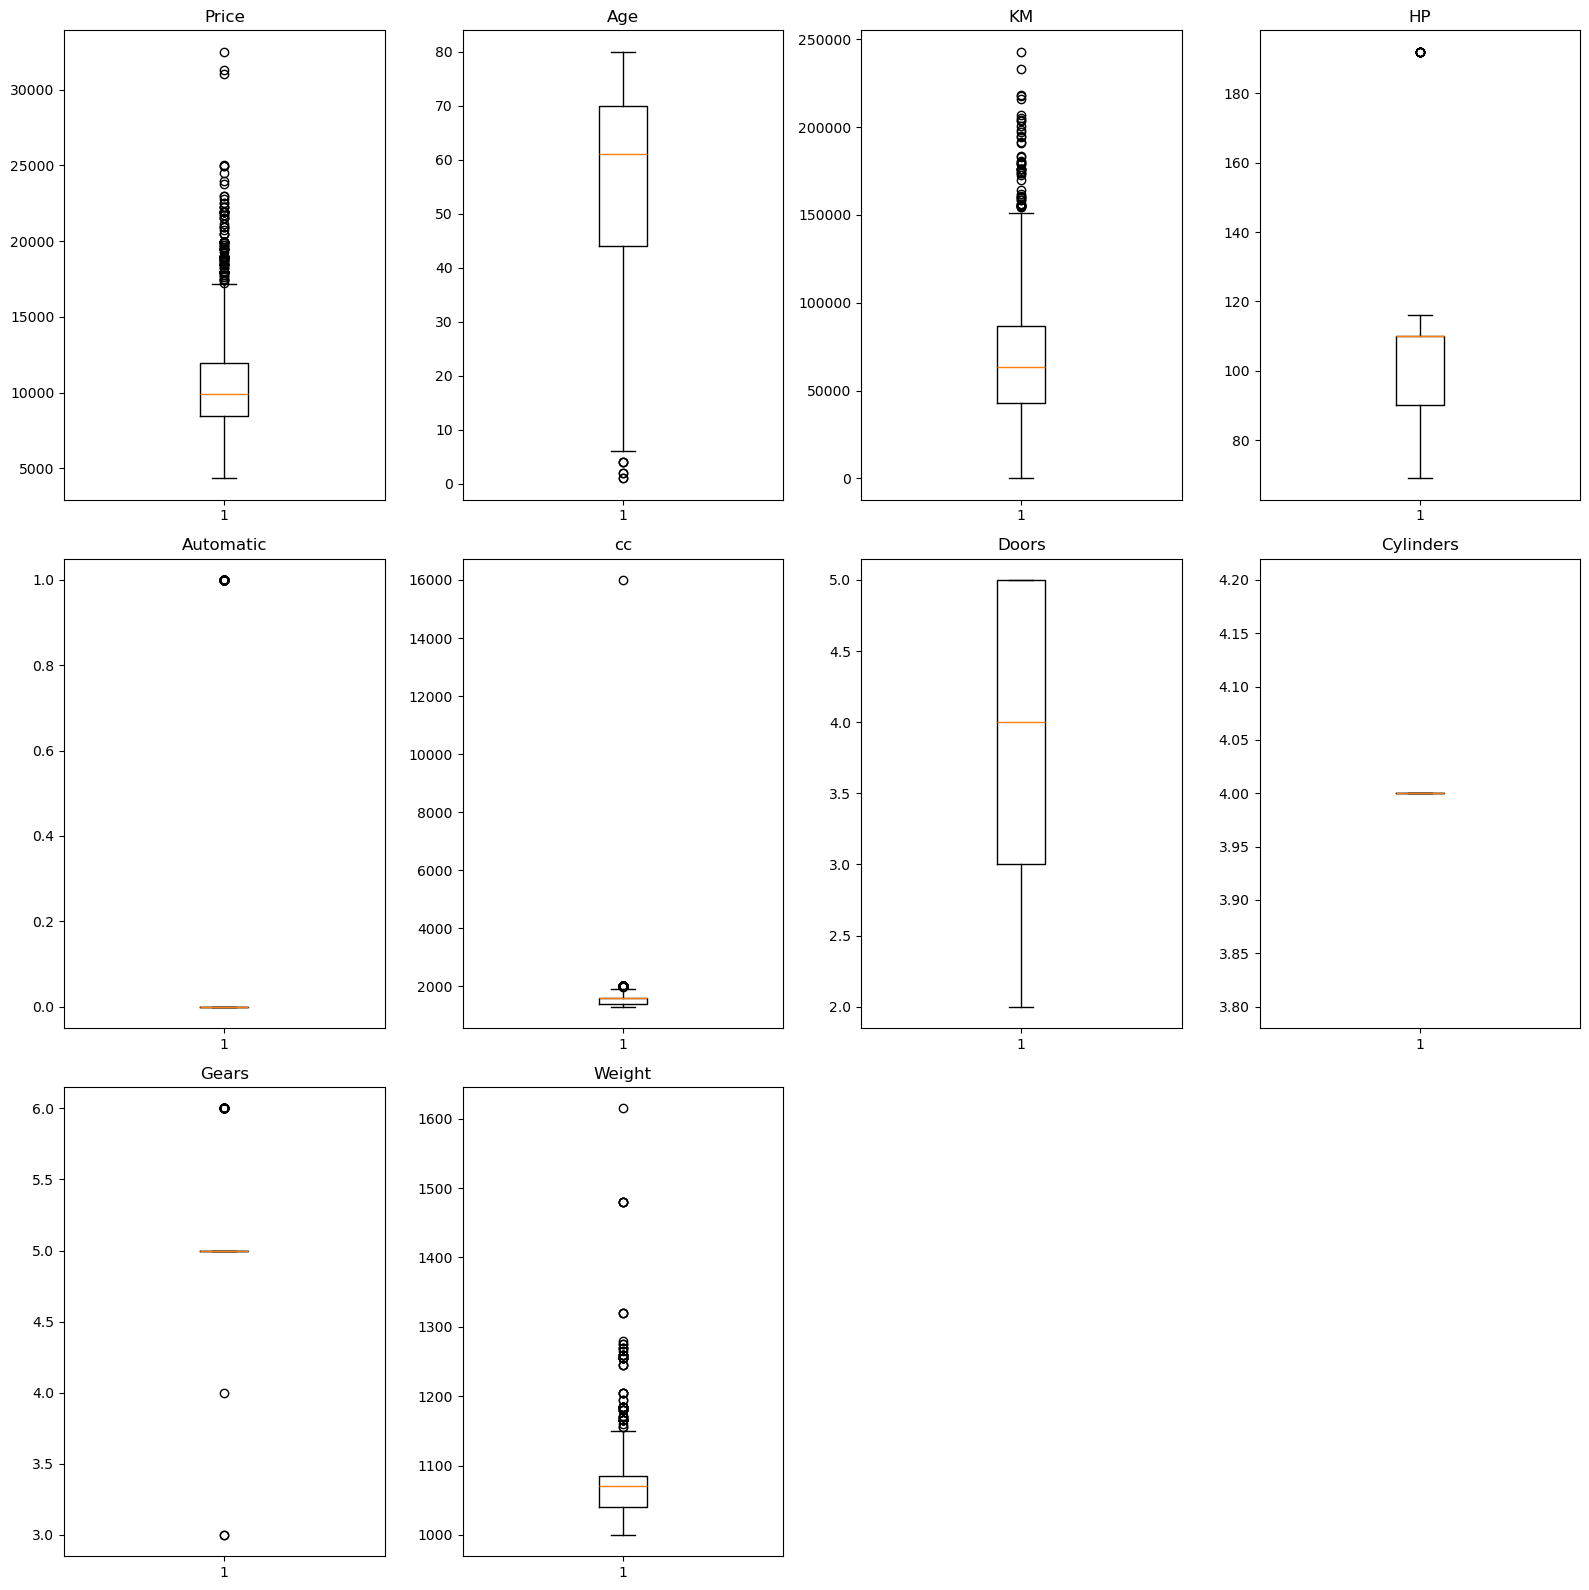

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define columns correctly as a list
columns = ['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
           'Cylinders', 'Gears', 'Weight']

# Define rows and columns for subplots
cols = 4
rows = 3

# Create subplots
fig, a = plt.subplots(rows, cols, figsize=(16, 16))
a = a.flatten()  # Ensure it's a 1D array of AxesSubplot

# Loop through each column and plot boxplots
for i, col in enumerate(columns):
    if col in df.columns:  # Ensure column exists in DataFrame
        df[col] = pd.to_numeric(df[col], errors='coerce').dropna()  # Convert to numeric and drop NaNs
        if not df[col].empty:  # Plot only if data is available
            a[i].boxplot(df[col])
            a[i].set_title(col)

# Remove extra empty subplots
for j in range(len(columns), len(a)):
    fig.delaxes(a[j])

plt.tight_layout()
plt.show()


In [54]:
# List of columns to apply Winsorization
winsorize_cols = ['HP', 'cc', 'KM', 'Weight']

# Create a copy of the original DataFrame to store Winsorized data
df_winsorized = df.copy()

# Apply Winsorization with 5% threshold (default range 0.05)
for col in winsorize_cols:
    if col in df.columns:
        # Convert column to numeric again to avoid errors
        df_winsorized[col] = pd.to_numeric(df_winsorized[col], errors='coerce')
        # Apply Winsorization with 5% limits on both sides
        df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])

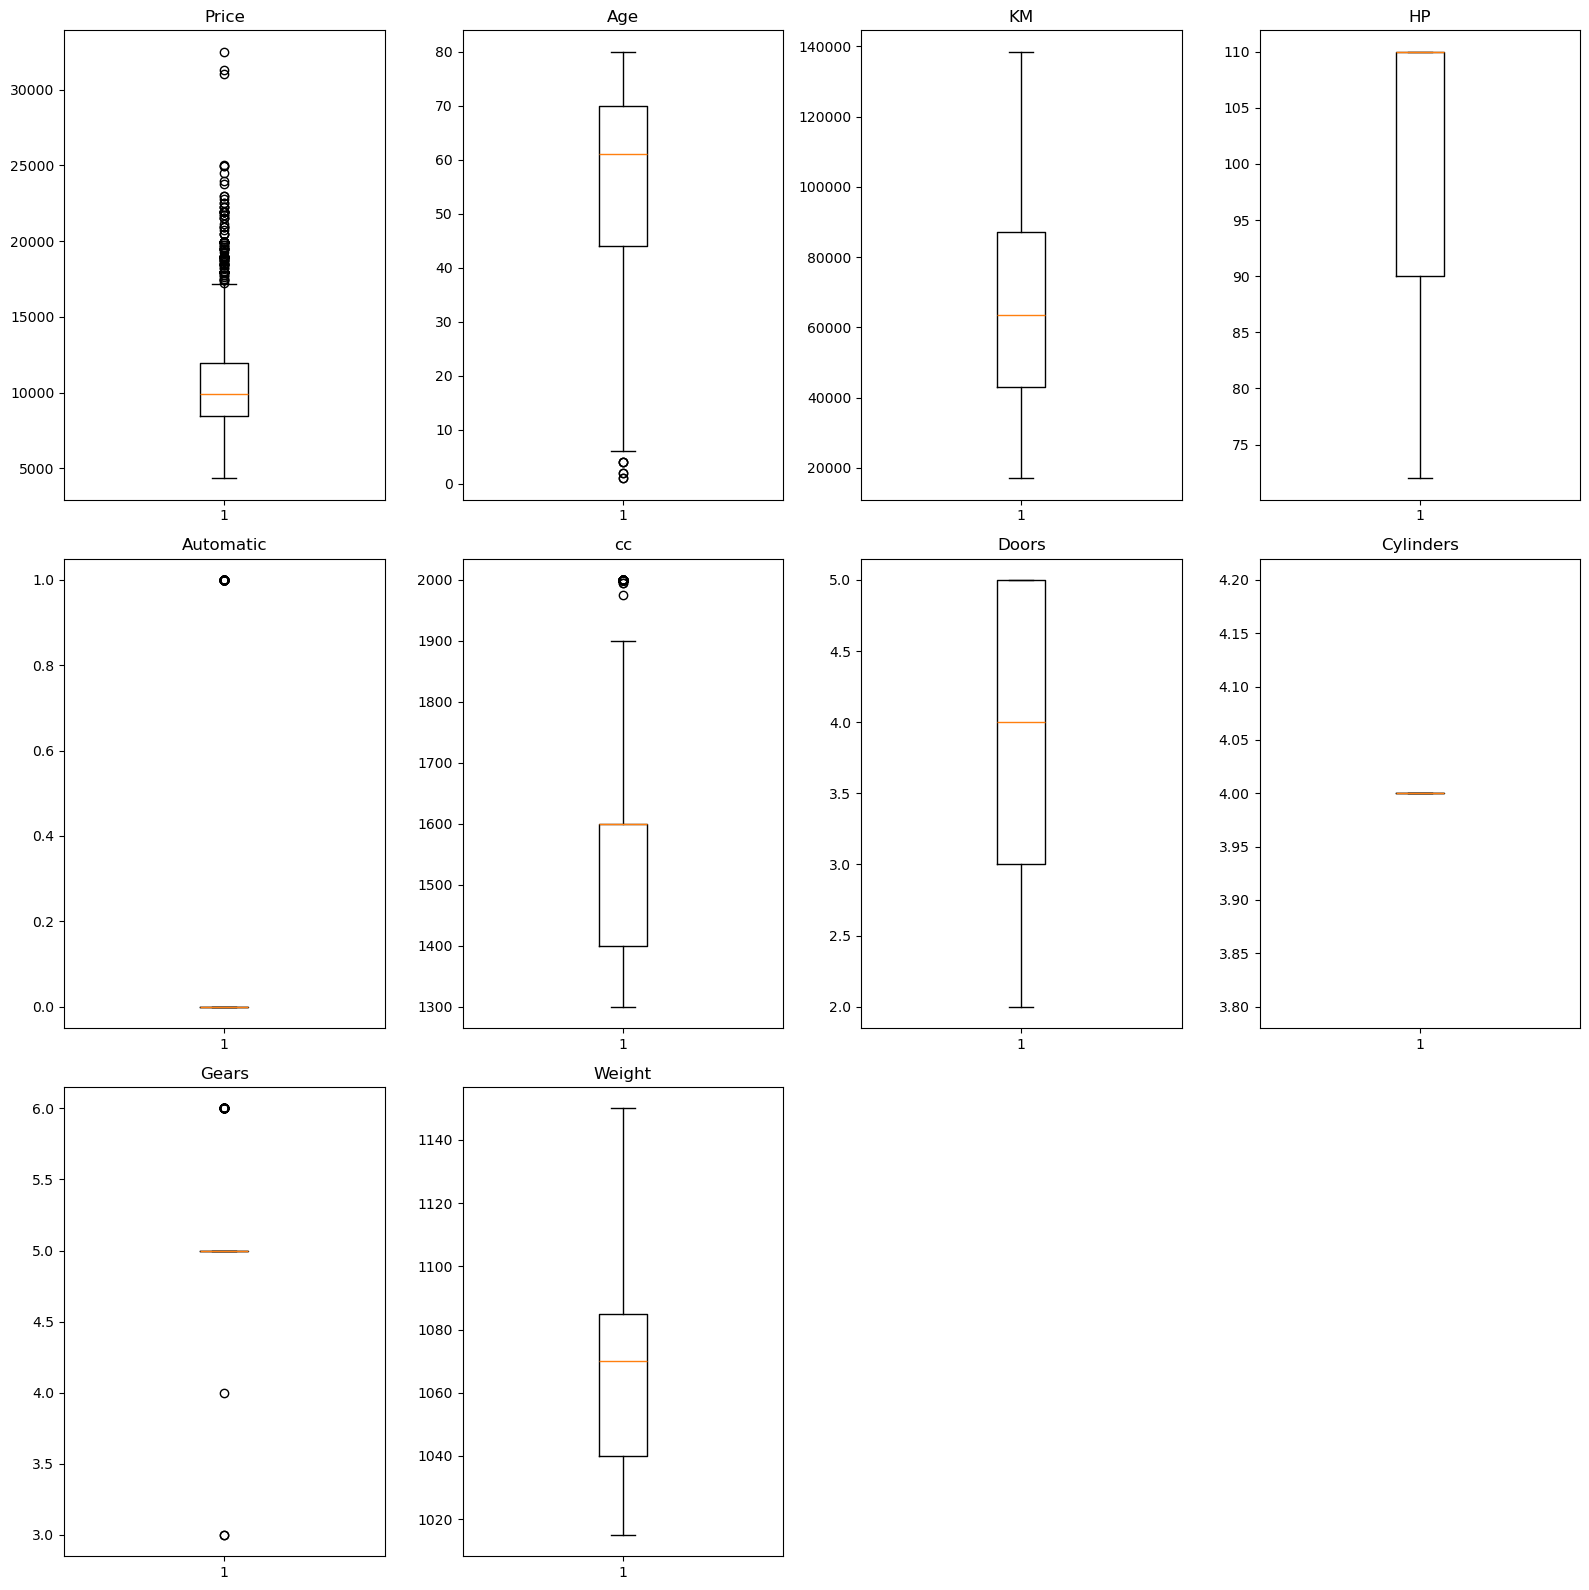

In [55]:
# Define columns correctly as a list
columns = ['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
           'Cylinders', 'Gears', 'Weight']

# Define rows and columns for subplots
cols = 4
rows = 3

# Create subplots
fig1,a1 = plt.subplots(rows, cols, figsize=(16, 16))
a1 = a1.flatten()  # Ensure it's a 1D array of AxesSubplot

# Loop through each column and plot boxplots
for i, col in enumerate(columns):
    if col in df_winsorized.columns:  # Ensure column exists in DataFrame
        df_winsorized[col] = pd.to_numeric(df_winsorized[col], errors='coerce').dropna()  # Convert to numeric and drop NaNs
        if not df_winsorized[col].empty:  # Plot only if data is available
            a1[i].boxplot(df_winsorized[col])
            a1[i].set_title(col)

# Remove extra empty subplots
for j in range(len(columns), len(a1)):
    fig1.delaxes(a1[j])

plt.tight_layout()
plt.show()


In [56]:
# Drop 'Cylinders' Column (irrelevant feature)
df.drop('Cylinders', axis=1, inplace=True)


# 2: Pre-processing

In [58]:
X = df.drop('Price', axis=1)
y = df['Price']

In [59]:
# Define Columns for Scaling and Encoding
num_features = ['Age', 'KM', 'HP', 'cc', 'Doors', 'Weight']
cat_features = ['Fuel_Type']

In [60]:
# Standardize Numerical Features
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [61]:
# Encode Categorical Features
encoder = OneHotEncoder(drop='first')
encoded_cat = encoder.fit_transform(X[cat_features]).toarray()
encoded_columns = encoder.get_feature_names_out(cat_features)
X_encoded = pd.DataFrame(encoded_cat, columns=encoded_columns)

In [62]:
# Concatenate Encoded Features with Numerical Features
X = X.drop(cat_features, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded], axis=1)

# Step 3: Build Models

In [83]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Model 1: Basic Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred = mlr_model.predict(X_test)

In [87]:
# Model 2: Feature Selection (Dropping 'Doors')
X_fs = X.drop(['Doors'], axis=1)
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.2, random_state=42)
mlr_model_fs = LinearRegression()
mlr_model_fs.fit(X_train_fs, y_train_fs)
y_pred_fs = mlr_model_fs.predict(X_test_fs)

In [93]:
# Model 3: Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Step 4: Evaluation Function

In [96]:
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

In [98]:
# Evaluation Summary
results = pd.DataFrame({
    'Model': ['Basic MLR', 'Feature Selection MLR', 'Polynomial Regression'],
    'R-squared': [evaluate_model(y_test, y_pred)[0],
                  evaluate_model(y_test_fs, y_pred_fs)[0],
                  evaluate_model(y_test, y_pred_poly)[0]],
    'MAE': [evaluate_model(y_test, y_pred)[1],
            evaluate_model(y_test_fs, y_pred_fs)[1],
            evaluate_model(y_test, y_pred_poly)[1]],
    'RMSE': [evaluate_model(y_test, y_pred)[2],
             evaluate_model(y_test_fs, y_pred_fs)[2],
             evaluate_model(y_test, y_pred_poly)[2]]
})
print(results)


                   Model  R-squared         MAE         RMSE
0              Basic MLR   0.834889  990.887274  1484.265415
1  Feature Selection MLR   0.836080  996.434505  1478.900832
2  Polynomial Regression   0.760292  908.790187  1788.401337


# Step 5: Lasso & Ridge

In [101]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

models = {'Lasso': lasso, 'Ridge': ridge}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2, mae, rmse = evaluate_model(y_test, y_pred)
    print(f"{model_name} Regression:")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}\n")


Lasso Regression:
R2 Score: 0.8349
MAE: 990.8965
RMSE: 1483.9995

Ridge Regression:
R2 Score: 0.8349
MAE: 990.8693
RMSE: 1484.0932



# Interview question 

### 1. What is Normalization & Standardization and how is it helpful?

--> Normalization:
1. Scales data between 0 and 1 or -1 and 1.

2. Formula:
   𝑋′=𝑋−𝑋min/𝑋max−𝑋min

3. Used for: Distance-based models (KNN, K-means).

Standardization:
1. Scales data to have mean = 0 and standard deviation = 1.

2. Formula:
    𝑋′=𝑋−𝜇/𝜎
3. Used for: Normal distribution models (Logistic Regression, PCA).

### 2. Techniques to Address Multicollinearity in Multiple Linear Regression

--> 1. VIF (Variance Inflation Factor) → Remove variables with VIF > 10.

2. Correlation Matrix → Drop one of the highly correlated features (correlation > 0.8).

3. PCA (Principal Component Analysis) → Combine correlated variables.

4. Ridge Regression (L2) → Reduces coefficient size.

5. Lasso Regression (L1) → Shrinks some coefficients to zero (feature selection).

6. Feature Selection → Use Backward Elimination or RFE.

7. Remove or Combine Variables → Drop or merge correlated features.